In [ ]:
import numpy as np 
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

## **Import Datasets**

In [ ]:
q1_2017 = pd.read_csv('/content/drive/My Drive/Bikeshare Ridership (2017 Q1).csv')
q2_2017 = pd.read_csv('/content/drive/My Drive/Bikeshare Ridership (2017 Q2).csv')
q3_2017 = pd.read_csv('/content/drive/My Drive/Bikeshare Ridership (2017 Q3).csv')
q4_2017 = pd.read_csv('/content/drive/My Drive/Bikeshare Ridership (2017 Q4).csv')

##**Data Preparation**

In [ ]:
toronto = [q1_2017, q2_2017, q3_2017, q4_2017]
df2017 = pd.concat(toronto)
df2017.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member


In [ ]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492369 entries, 0 to 363404
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trip_id                1492369 non-null  int64  
 1   trip_start_time        1492369 non-null  object 
 2   trip_stop_time         1492369 non-null  object 
 3   trip_duration_seconds  1492369 non-null  int64  
 4   from_station_id        465476 non-null   float64
 5   from_station_name      1492369 non-null  object 
 6   to_station_id          465476 non-null   float64
 7   to_station_name        1492368 non-null  object 
 8   user_type              1492369 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 113.9+ MB


In [ ]:
# Check if there is any missing value
df2017.isnull().sum()

trip_id                        0
trip_start_time                0
trip_stop_time                 0
trip_duration_seconds          0
from_station_id          1026893
from_station_name              0
to_station_id            1026893
to_station_name                1
user_type                      0
dtype: int64

In [ ]:
q1_2017['trip_start_time'] = pd.to_datetime(q1_2017['trip_start_time'])
q2_2017['trip_start_time'] = pd.to_datetime(q2_2017['trip_start_time'])
q3_2017['trip_start_time'] = pd.to_datetime(q3_2017['trip_start_time'])
q4_2017['trip_start_time'] = pd.to_datetime(q4_2017['trip_start_time'])
df2017['trip_start_time'] = pd.to_datetime(df2017['trip_start_time'])

In [ ]:
q1_2017['trip_stop_time'] = pd.to_datetime(q1_2017['trip_stop_time'], errors='coerce')
q2_2017['trip_stop_time'] = pd.to_datetime(q2_2017['trip_stop_time'], errors='coerce')
q3_2017['trip_stop_time'] = pd.to_datetime(q3_2017['trip_stop_time'], errors='coerce')
q4_2017['trip_stop_time'] = pd.to_datetime(q4_2017['trip_stop_time'], errors='coerce')
df2017['trip_stop_time'] = pd.to_datetime(df2017['trip_stop_time'], errors='coerce')

In [ ]:
q1_2017['hour_start'] = q1_2017['trip_start_time'].apply(lambda time: time.hour)
q1_2017['hour_stop'] = q1_2017['trip_stop_time'].apply(lambda time: time.hour)

q2_2017['hour_start'] = q2_2017['trip_start_time'].apply(lambda time: time.hour)
q2_2017['hour_stop'] = q2_2017['trip_stop_time'].apply(lambda time: time.hour)

q3_2017['hour_start'] = q3_2017['trip_start_time'].apply(lambda time: time.hour)
q3_2017['hour_stop'] = q3_2017['trip_stop_time'].apply(lambda time: time.hour)

q4_2017['hour_start'] = q4_2017['trip_start_time'].apply(lambda time: time.hour)
q4_2017['hour_stop'] = q4_2017['trip_stop_time'].apply(lambda time: time.hour)

df2017['hour_start'] = df2017['trip_start_time'].apply(lambda time: time.hour)
df2017['hour_stop'] = df2017['trip_stop_time'].apply(lambda time: time.hour)

In [ ]:
q1_2017['day_start'] = q1_2017['trip_start_time'].apply(lambda time: time.dayofweek)
q1_2017['day_stop'] = q1_2017['trip_stop_time'].apply(lambda time: time.dayofweek)

q2_2017['day_start'] = q2_2017['trip_start_time'].apply(lambda time: time.dayofweek)
q2_2017['day_stop'] = q2_2017['trip_stop_time'].apply(lambda time: time.dayofweek)

q3_2017['day_start'] = q3_2017['trip_start_time'].apply(lambda time: time.dayofweek)
q3_2017['day_stop'] = q3_2017['trip_stop_time'].apply(lambda time: time.dayofweek)

q4_2017['day_start'] = q4_2017['trip_start_time'].apply(lambda time: time.dayofweek)
q4_2017['day_stop'] = q4_2017['trip_stop_time'].apply(lambda time: time.dayofweek)

df2017['weekday_start'] = df2017['trip_start_time'].apply(lambda time: time.dayofweek)
df2017['weekday_stop'] = df2017['trip_stop_time'].apply(lambda time: time.dayofweek)

In [ ]:
q1_2017['month_start'] = q1_2017['trip_start_time'].apply(lambda time: time.month)
q1_2017['month_stop'] = q1_2017['trip_stop_time'].apply(lambda time: time.month)

q2_2017['month_start'] = q2_2017['trip_start_time'].apply(lambda time: time.month)
q2_2017['month_stop'] = q2_2017['trip_stop_time'].apply(lambda time: time.month)

q3_2017['month_start'] = q3_2017['trip_start_time'].apply(lambda time: time.month)
q3_2017['month_stop'] = q3_2017['trip_stop_time'].apply(lambda time: time.month)

q4_2017['month_start'] = q4_2017['trip_start_time'].apply(lambda time: time.month)
q4_2017['month_stop'] = q4_2017['trip_stop_time'].apply(lambda time: time.month)

df2017['month_start'] = df2017['trip_start_time'].apply(lambda time: time.month)
df2017['month_stop'] = df2017['trip_stop_time'].apply(lambda time: time.month)


In [ ]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

q1_2017['day_start'] = q1_2017['day_start'].map(day)
q1_2017['day_stop'] = q1_2017['day_stop'].map(day)

q2_2017['day_start'] = q2_2017['day_start'].map(day)
q2_2017['day_stop'] = q2_2017['day_stop'].map(day)

q3_2017['day_start'] = q3_2017['day_start'].map(day)
q3_2017['day_stop'] = q3_2017['day_stop'].map(day)

q4_2017['day_start'] = q4_2017['day_start'].map(day)
q4_2017['day_stop'] = q4_2017['day_stop'].map(day)

df2017['weekday_start'] = df2017['weekday_start'].map(day)
df2017['weekday_stop'] = df2017['weekday_stop'].map(day)

In [ ]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

q1_2017['month_start'] = q1_2017['month_start'].map(mon)
q1_2017['month_stop'] = q1_2017['month_stop'].map(mon)

q2_2017['month_start'] = q2_2017['month_start'].map(mon)
q2_2017['month_stop'] = q2_2017['month_stop'].map(mon)

q3_2017['month_start'] = q3_2017['month_start'].map(mon)
q3_2017['month_stop'] = q3_2017['month_stop'].map(mon)

q4_2017['month_start'] = q4_2017['month_start'].map(mon)
q4_2017['month_stop'] = q4_2017['month_stop'].map(mon)

df2017['month_start'] = df2017['month_start'].map(mon)
df2017['month_stop'] = df2017['month_stop'].map(mon)

In [ ]:
df2017.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,hour_start,hour_stop,weekday_start,weekday_stop,month_start,month_stop
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,0,0.0,Sun,Sun,Jan,Jan
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,0,0.0,Sun,Sun,Jan,Jan
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,0,0.0,Sun,Sun,Jan,Jan
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,0,0.0,Sun,Sun,Jan,Jan
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,0,0.0,Sun,Sun,Jan,Jan


##**a. Find out what percentage of bikes are returned to its initial location ?**

In [ ]:
route_station_2017_1 = np.where(q1_2017['from_station_name'] == q1_2017['to_station_name'], 'Init point', 'different point')
route_station_2017_2 = np.where(q2_2017['from_station_name'] == q2_2017['to_station_name'], 'Init point', 'different point')
route_station_2017_3 = np.where(q3_2017['from_station_name'] == q3_2017['to_station_name'], 'Init point', 'different point')
route_station_2017_4 = np.where(q4_2017['from_station_name'] == q4_2017['to_station_name'], 'Init point', 'different point')
route_station_2017 = np.where(df2017['from_station_id'] == df2017['to_station_id'], 'Init point', 'different point')

In [ ]:
q1_2017['Return_point'] = route_station_2017_1
q2_2017['Return_point'] = route_station_2017_2
q3_2017['Return_point'] = route_station_2017_3
q4_2017['Return_point'] = route_station_2017_4
df2017['Return_point'] = route_station_2017

In [ ]:
return_point_2017_1 = q1_2017['Return_point'].value_counts() 
return_point_2017_2 = q2_2017['Return_point'].value_counts() 
return_point_2017_3 = q3_2017['Return_point'].value_counts() 
return_point_2017_4 = q4_2017['Return_point'].value_counts() 
return_point_2017 = df2017['Return_point'].value_counts()

In [ ]:
all_bike_2017_1 = q1_2017['Return_point'].count()
all_bike_2017_2 = q2_2017['Return_point'].count()
all_bike_2017_3 = q3_2017['Return_point'].count()
all_bike_2017_4 = q4_2017['Return_point'].count()
all_bike_2017 = df2017['Return_point'].count()

In [ ]:
init_bike_2017_1 = return_point_2017_1['Init point']
init_bike_2017_2 = return_point_2017_2['Init point']
init_bike_2017_3 = return_point_2017_3['Init point']
init_bike_2017_4 = return_point_2017_4['Init point']
init_bike_2017 = return_point_2017['Init point']

In [ ]:
bike_returned_2017_1 = (init_bike_2017_1/all_bike_2017_1)*100
bike_returned_2017_2 = (init_bike_2017_2/all_bike_2017_2)*100
bike_returned_2017_3 = (init_bike_2017_3/all_bike_2017_3)*100
bike_returned_2017_4 = (init_bike_2017_4/all_bike_2017_4)*100
bike_returned_2017 = (init_bike_2017/all_bike_2017)*100

In [ ]:
print('Percentage of all Quarter bikes are returned to its initial location on 2017')
print('Q1 2017 : %.2f' %bike_returned_2017_1, '%')  
print('Q2 2017 : %.2f' %bike_returned_2017_2, '%')  
print('Q3 2017 : %.2f' %bike_returned_2017_3, '%')  
print('Q4 2017 : %.2f' %bike_returned_2017_4, '%')  

Percentage of all Quarter bikes are returned to its initial location on 2017
Q1 2017 : 1.17 %
Q2 2017 : 3.08 %
Q3 2017 : 7.08 %
Q4 2017 : 3.57 %


Text(0.5, 1.0, 'Comparison of All Quarter Bikes are Returned to Its Initial Location on 2017')

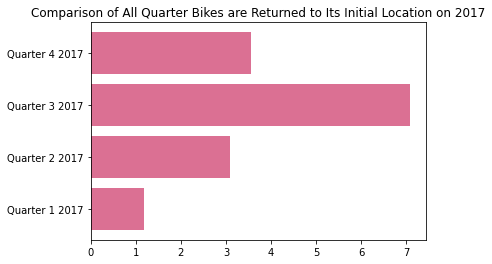

In [ ]:
# Get visual comparison of all Quarter bikes are returned to its initial location on 2017
plt.barh(['Quarter 1 2017', 'Quarter 2 2017','Quarter 3 2017','Quarter 4 2017'], 
         [bike_returned_2017_1, bike_returned_2017_2, bike_returned_2017_3, bike_returned_2017_4],color='palevioletred')
plt.title("Comparison of All Quarter Bikes are Returned to Its Initial Location on 2017")

In [ ]:
print('Percentage of bikes are returned to its initial location on 2017 is %.2f' %bike_returned_2017, '%' )

Percentage of bikes are returned to its initial location on 2017 is 0.79 %


##**b. When are the peak hours of the day ?**

By Hours

In [ ]:
newdf = df2017.copy()
newdf = newdf.groupby('hour_start').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 The Peak Hours of The Day on 2017')

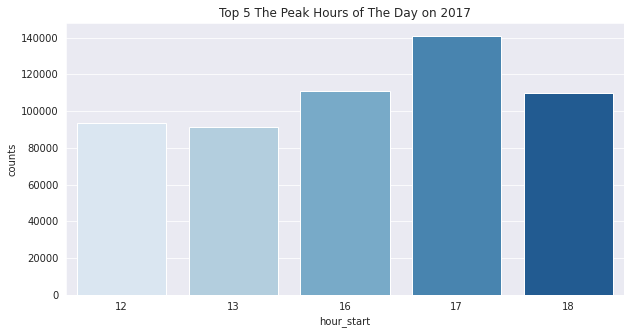

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
Peak_Hour = sns.barplot(data=newdf, x='hour_start', y='counts', palette='Blues')
plt.title('Top 5 The Peak Hours of The Day on 2017')

By Days

In [ ]:
newdf1 = df2017.copy()
newdf1 = newdf1.groupby('weekday_start').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

Text(0.5, 1.0, 'The Peak Day of The Week on 2017')

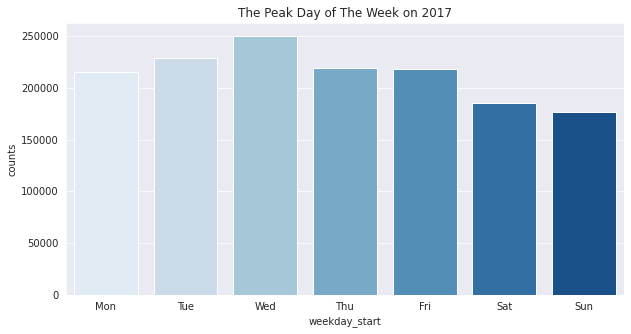

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Peak_Day = sns.barplot(data=newdf1, x='weekday_start', y='counts',order = order, palette='Blues')
plt.title('The Peak Day of The Week on 2017')

By Days

In [ ]:
newdf2 = df2017.copy()
newdf2 = newdf2.groupby('month_start').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

Text(0.5, 1.0, 'The Peak Month of The Year on 2017')

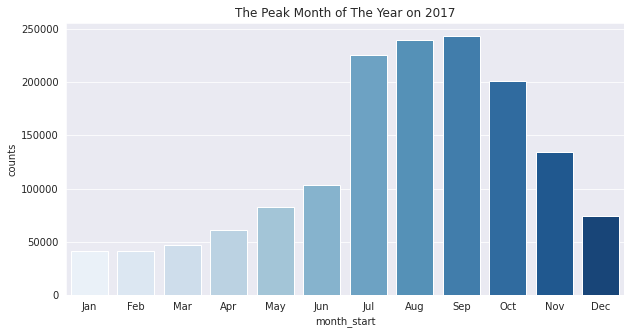

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Peak_Day = sns.barplot(data=newdf2, x='month_start', y='counts',order = order, palette='Blues')
plt.title('The Peak Month of The Year on 2017')

##**c. Which station is the most crowded / needed ?**

In [ ]:
num_occurances = dict(Counter(df2017.from_station_name))

top_trip_starting_area = sorted(num_occurances.items(), key = lambda x : x[1], reverse=True)[:5]
top_trip_ending_area = sorted(dict(Counter(df2017.to_station_name)).items(), key= lambda x : x[1], reverse= True)[:5]

In [ ]:
print("The Top 5 Most Crowded Station for Departures : \n")
print(*top_trip_starting_area, sep="\n")
print()
print("The Top 5 Most Crowded Station for Destinations : \n")
print(*top_trip_ending_area, sep="\n")

The Top 5 Most Crowded Station for Departures : 

('Union Station', 22143)
('Simcoe St / Wellington St W', 21365)
('York St / Queens Quay W', 19143)
('Bay St / Wellesley St W', 18082)
('King St W / Spadina Ave', 18039)

The Top 5 Most Crowded Station for Destinations : 

('Union Station', 29228)
('Simcoe St / Wellington St W', 22809)
('York St / Queens Quay W', 20768)
('King St W / Spadina Ave', 19521)
('Queen St W / Portland St', 17872)


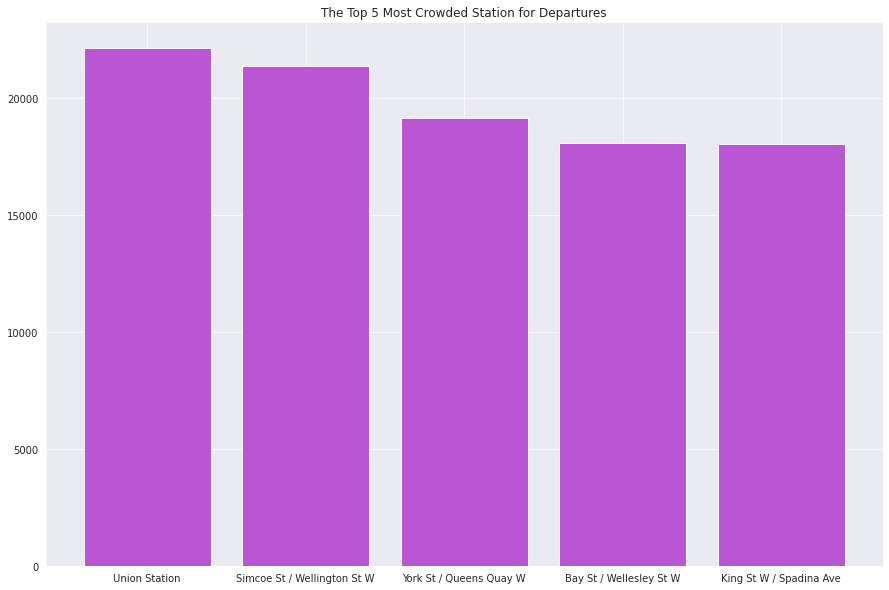

In [ ]:
plt.figure(figsize=(15,10))
x,y = zip (*top_trip_starting_area)
plt.bar(x,y,color=('mediumorchid'))
plt.title('The Top 5 Most Crowded Station for Departures')
plt.show()

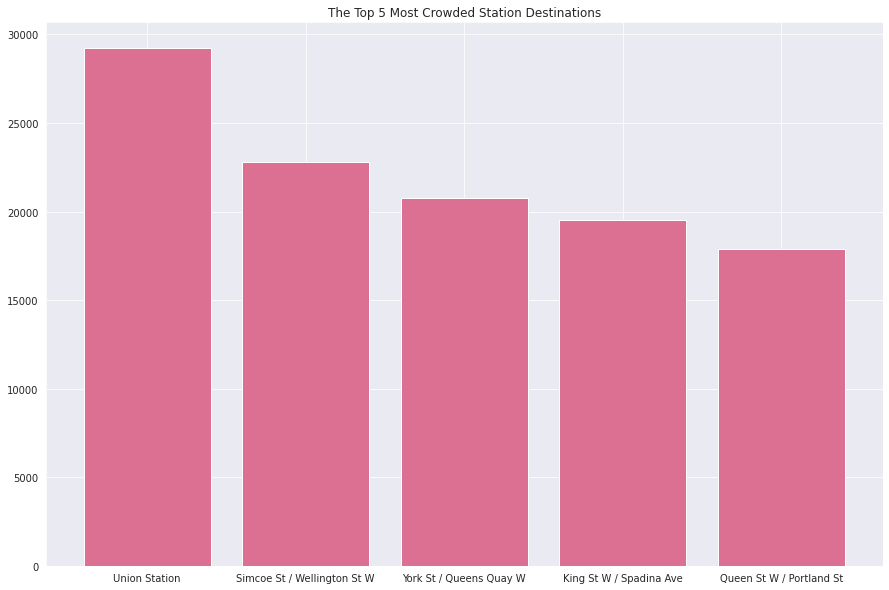

In [ ]:
plt.figure(figsize=(15,10))
z,a = zip (*top_trip_ending_area)
plt.bar(z,a,color=('palevioletred'))
plt.title('The Top 5 Most Crowded Station Destinations')
plt.show()

##**d. Compare behavior both of user type !**

In [ ]:
annualdf = df2017.copy()
annualdf = df2017[df2017['user_type']=='Member']
annualdf = annualdf.groupby('from_station_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

In [ ]:
# Get visual Top 10 Departing Stations (Annual Members)
figsize=(10,5)
labels = annualdf['from_station_name']
values = annualdf['counts']
colors = ['orchid','mediumvioletred','deeppink','hotpink','lavenderblush','palevioletred','crimson','pink','lightpink','plum']

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig1.update_layout(title_text="Top 10 Departing Stations (Annual Members)")
fig1.update_traces(marker=dict(colors=colors))
fig1.show()

In [ ]:
customdf = df2017.copy()
customdf = df2017[df2017['user_type']=='Casual']
customdf = customdf.groupby('from_station_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

In [ ]:
# Get visual Top 10 Departing Stations (Casual Members)
figsize=(10,5)
labels = customdf['from_station_name']
values = customdf['counts']
colors = ['mediumpurple','rebeccapurple','blueviolet','indigo','violet','darkorchid','darkviolet','mediumorchid','thistle','plum']

fig2 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig2.update_layout(title_text="Top 10 Departing Stations (Casual Members)")
fig2.update_traces(marker=dict(colors=colors))
fig2.show()

Text(0.5, 1.0, 'The Peak Day based on User Type')

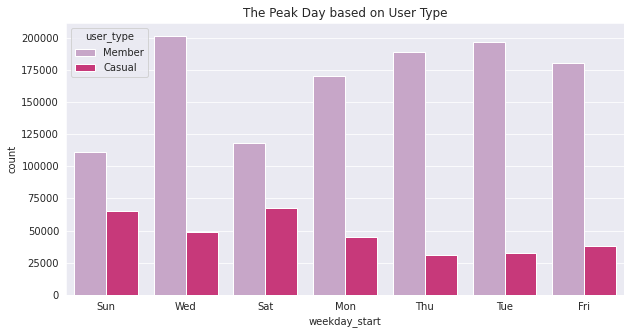

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=df2017, x='weekday_start', hue='user_type', palette='PuRd')
plt.title('The Peak Day based on User Type')